In [1]:
from data_analysis_codes import param
import matplotlib.pyplot as plt
import matplotlib
#from data_analysis_codes.tools import Cstyle
#plt.style.use(Cstyle.style1)
from matplotlib import gridspec
from data_analysis_codes.tools import LinData
import numpy as np
import h5py
from data_analysis_codes.tools import ReadingTools as RRead
from skimage import measure
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plotformat():
    A = -sim.lambda_pert/4
    B = sim.lambda_pert/2
    """
    ax.plot([A, A], [A, B], [A, A], 'w', zorder=3)
    ax.plot([A, A], [A, A], [A, B], 'w', zorder=3)
    ax.plot([A, B], [A, A], [A, A], 'w', zorder=3)
    ax.plot([A, B], [A, B], [A, A], 'w-.', zorder=3)
    ax.plot([A, A], [A, B], [A, B], 'w-.', zorder=3)
    ax.plot([A, B], [A, A], [A, B], 'w-.', zorder=3)
    ax.plot([B,A,A,A,B,B,B], [A,A,B,B,B,A,A], [B,B,B,A,A,A,B], 'w', zorder=3, linewidth=0.25)
    ax.plot([B,B], [-B,A], [B,B], 'w', zorder=3, linewidth=0.25)
    ax.plot([-B,A], [B,B], [B,B], 'w', zorder=3, linewidth=0.25)
    ax.plot([B,B], [B,B], [-B,A], 'w', zorder=3, linewidth=0.25)
    """
    ticks = [-sim.lambda_pert/2, -sim.lambda_pert/4, 0, sim.lambda_pert/4, sim.lambda_pert/2]
    tickm = [-0.5, -0.25, 0.0, 0.25, 0.5]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_zticks(ticks)
    ax.set_xticklabels(tickm)
    ax.set_yticklabels(tickm)
    ax.set_zticklabels(tickm)
    ax.set_xlabel(r'$x \;\; [\lambda_{pert}]$')
    ax.set_ylabel(r'$y \;\; [\lambda_{pert}]$')
    ax.set_zlabel(r'$z \;\; [\lambda_{pert}]$')
    ax.view_init(30,30)

In [3]:
sim = param.pflrw_d3e2_L1821_t1_N64_LCDM()
Lin = LinData.LinData_Class(sim, '/home/robynm/simulations/'+sim.sim_name+'/')
it = 22000
it_file_name = '/home/robynm/simulations/'+sim.sim_name+'/output-0000/'+sim.parfile_name+'/'+'all_iterations/'+sim.sim_name
f = h5py.File('{}_it_{:06d}.hdf5'.format(it_file_name, it), 'r')
E2 = np.array(f['E2'])
B2 = np.array(f['B2'])

 read time file


In [14]:
data = B2/E2

In [15]:
data[np.where(B2<1e-20)]=0

In [16]:
index = np.where(data==np.nanmax(data))
data[index], np.sqrt(B2)[index], np.sqrt(E2)[index]

<ipython-input-16-38d294866414>:2: RuntimeWarning: invalid value encountered in sqrt
  data[index], np.sqrt(B2)[index], np.sqrt(E2)[index]


(array([0.02592805]), array([4.07837647e-07]), array([2.53280846e-06]))

In [19]:
np.where(B2<1e-20)

(array([ 0,  0,  0, ..., 63, 63, 63]),
 array([ 0,  0, 16, ..., 48, 63, 63]),
 array([ 0, 32, 16, ..., 48, 33, 63]))

<IPython.core.display.Javascript object>


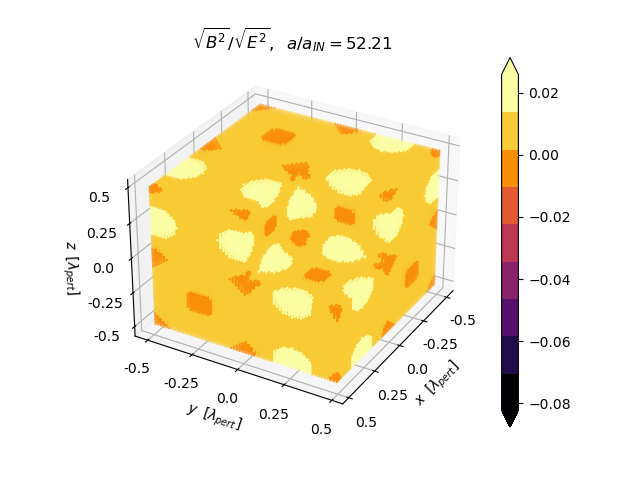

<ipython-input-17-10ed08f59a2b>:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [17]:
data = B2/E2
fig = plt.figure()
gs = gridspec.GridSpec(1, 1) 
ax = fig.add_subplot(gs[0], projection='3d')
cut = 0
mask = ~ np.logical_and(np.logical_and(Lin.d3x>cut, Lin.d3y>cut), Lin.d3z>cut) # cut out the UD
#mask = ~ np.logical_and(np.logical_and(Lin.d3x<cut, Lin.d3y<cut), Lin.d3z<cut) # cut out the OD
mask[int(64/4),int(64/4),int(64/4)] = False
mask[int(3*64/4),int(3*64/4),int(3*64/4)] = False
scatter = ax.scatter(Lin.d3x[mask], Lin.d3y[mask], Lin.d3z[mask], c=data[mask], s=1, cmap=matplotlib.cm.get_cmap('inferno', 9), zorder=1)
#scatter = ax.scatter(Lin.d3x, Lin.d3y, Lin.d3z, c=data, s=1, cmap=matplotlib.cm.get_cmap('inferno', 9), zorder=1)
fig.colorbar(scatter, extend='both')
an = Lin.temp_from_temp('an', 'it', it)
ax.set_title(r'$\sqrt{B^2}/\sqrt{E^2}, \;\; a/a_{IN}=$'+'{:.2f}'.format(an))
plotformat()
plt.tight_layout()

In [29]:
data[np.isnan(data)] = np.nanmin(data)

<IPython.core.display.Javascript object>


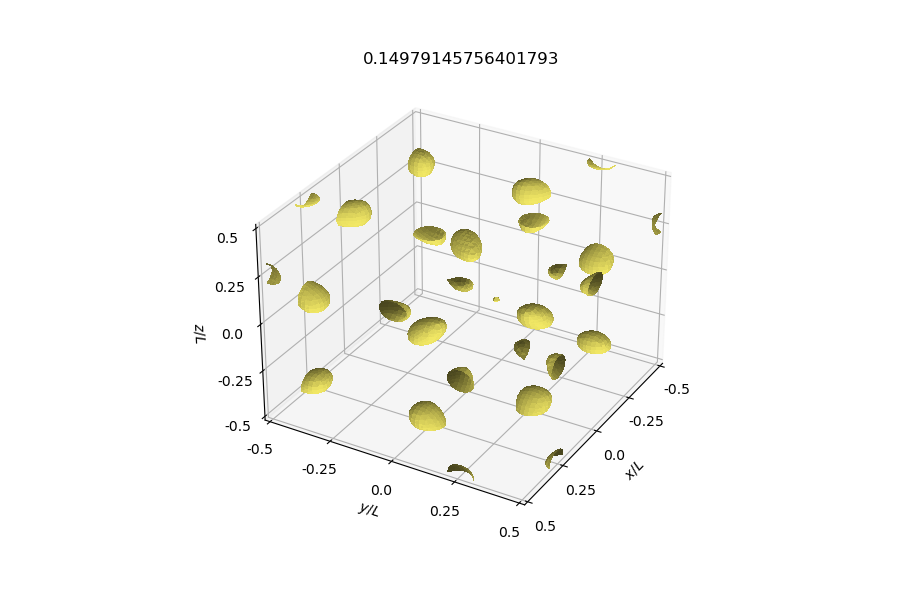

<ipython-input-38-6525351b6df6>:13: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[iso])


<IPython.core.display.Javascript object>


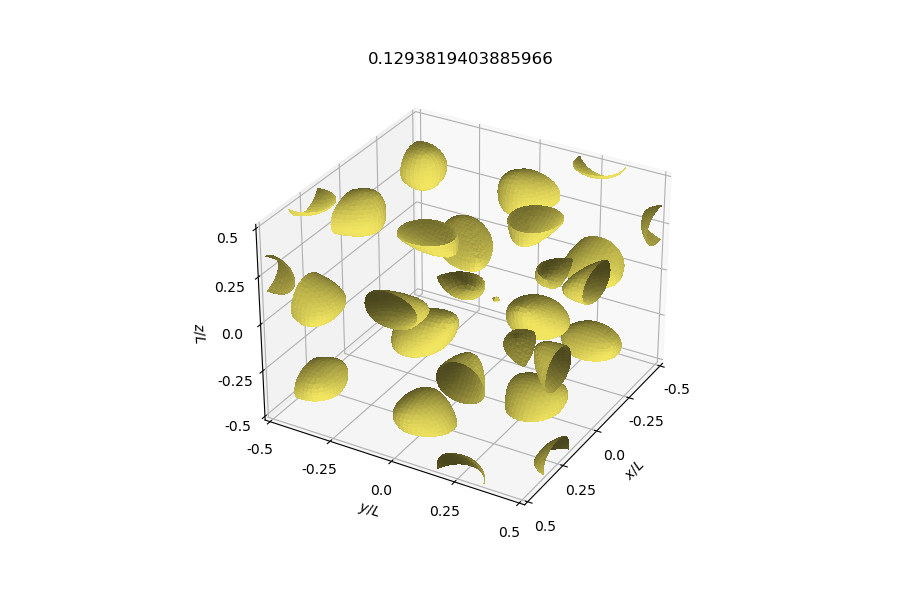

<IPython.core.display.Javascript object>


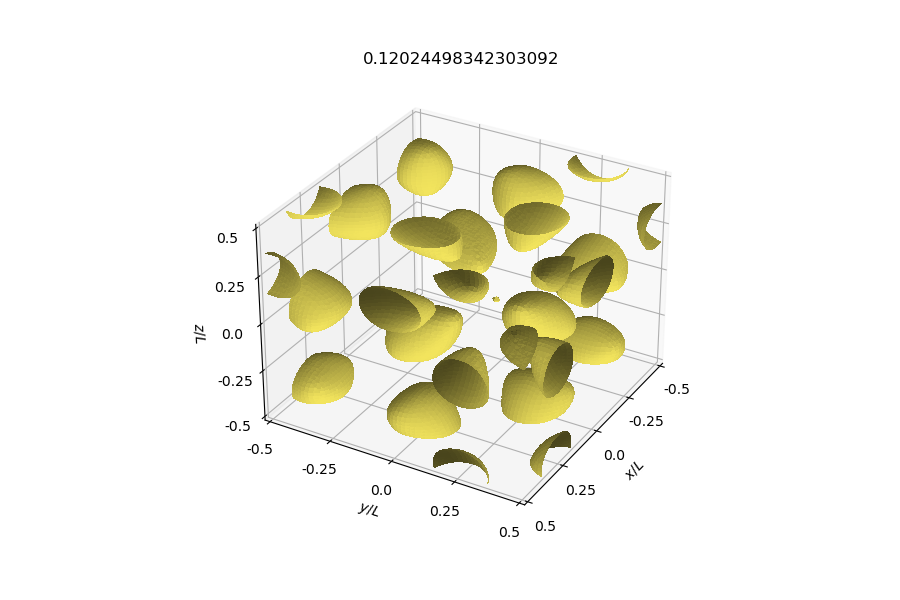

<IPython.core.display.Javascript object>


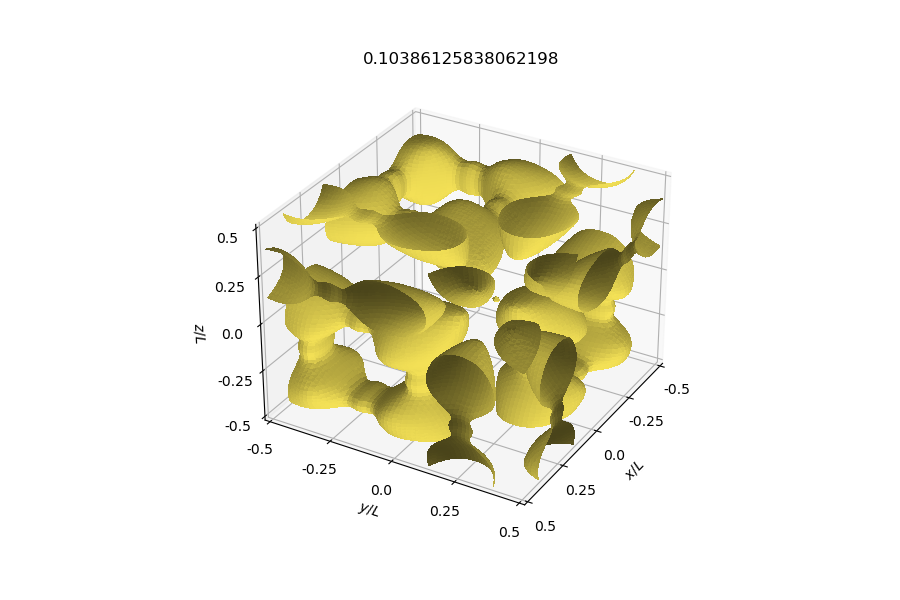

<IPython.core.display.Javascript object>


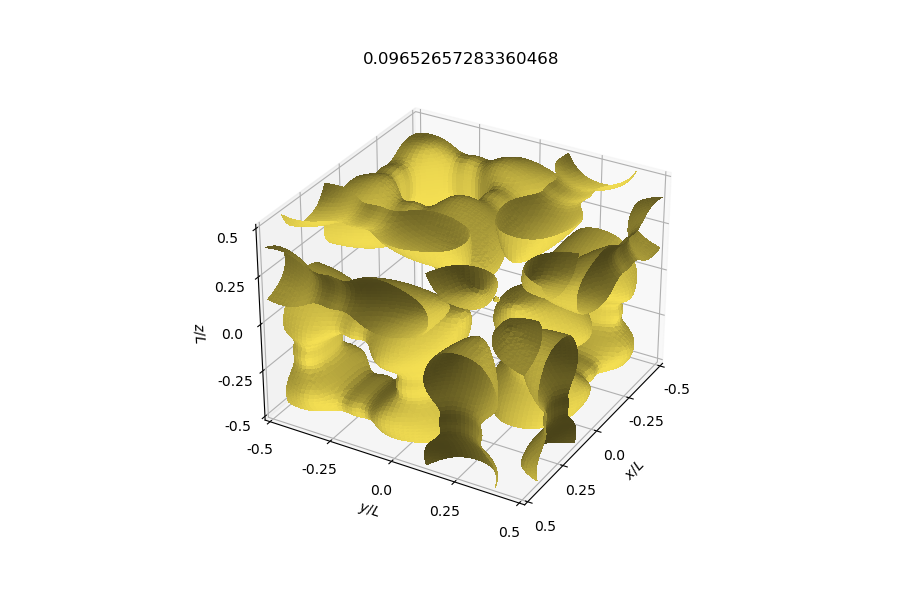

<IPython.core.display.Javascript object>


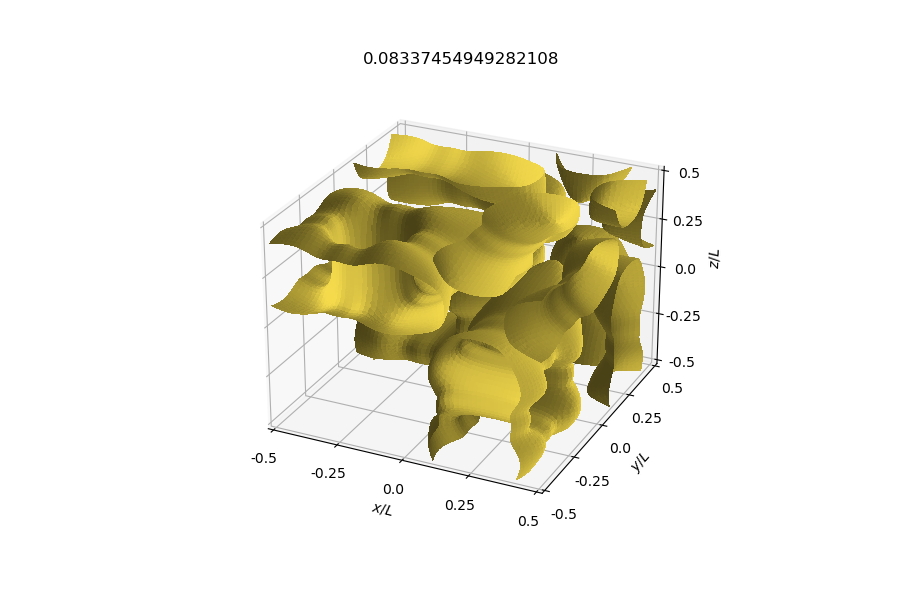

<IPython.core.display.Javascript object>


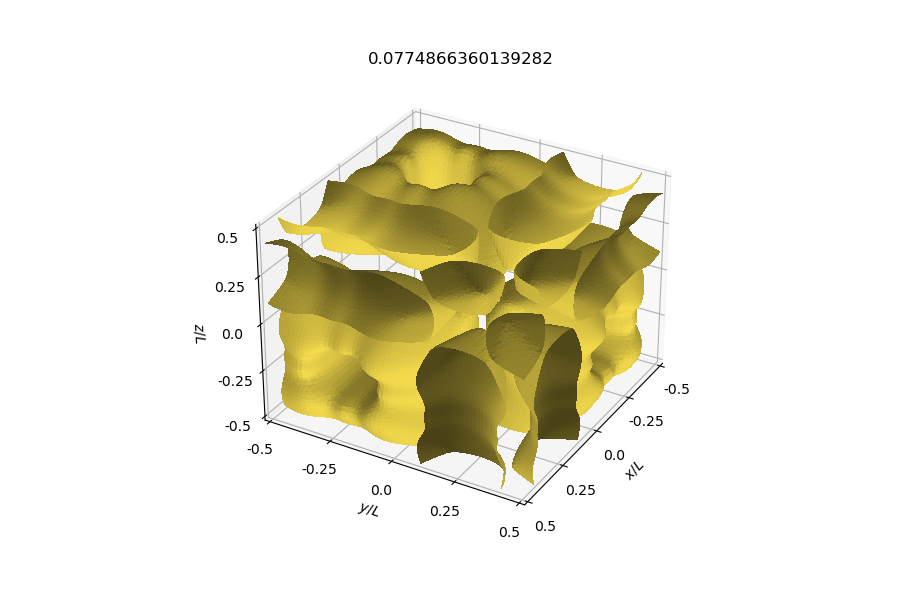

<IPython.core.display.Javascript object>


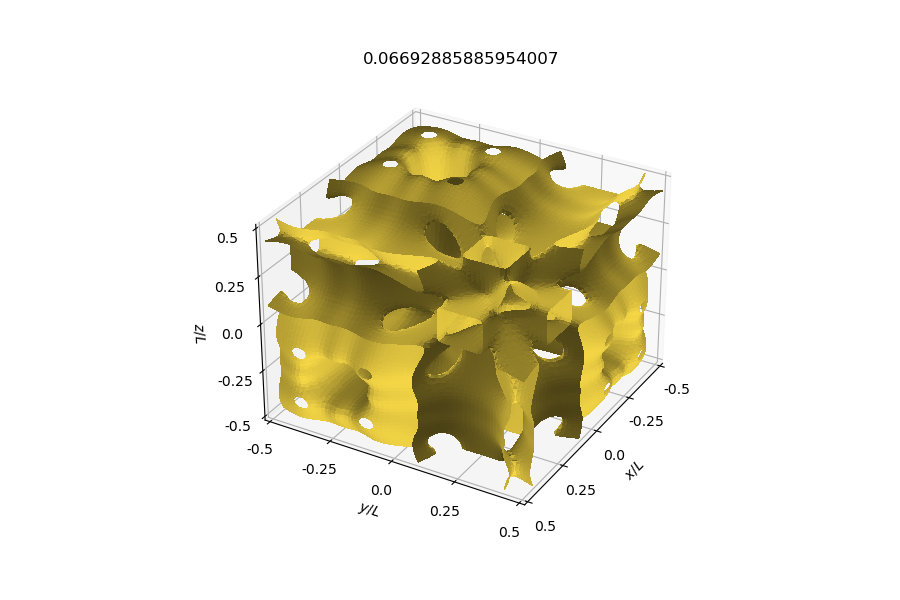

<IPython.core.display.Javascript object>


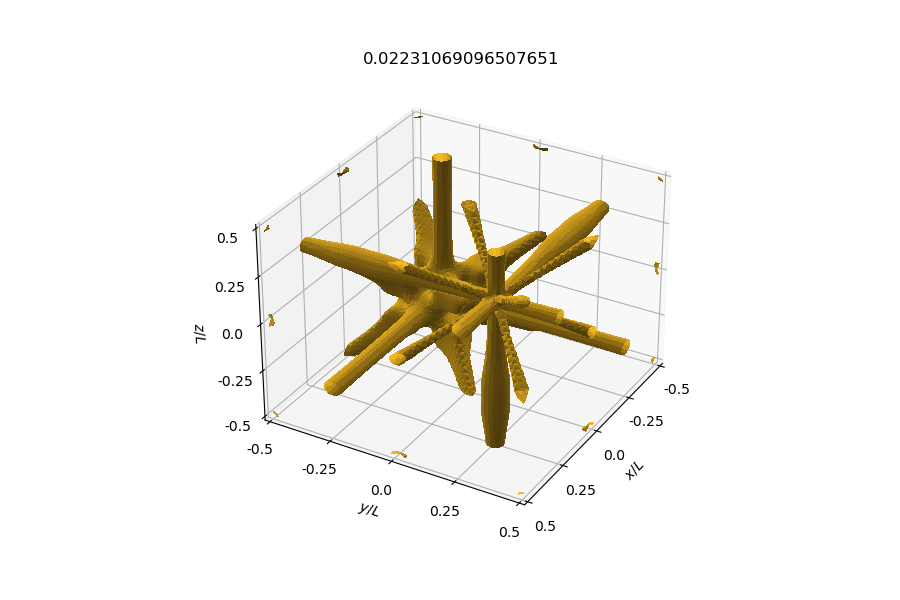

<IPython.core.display.Javascript object>


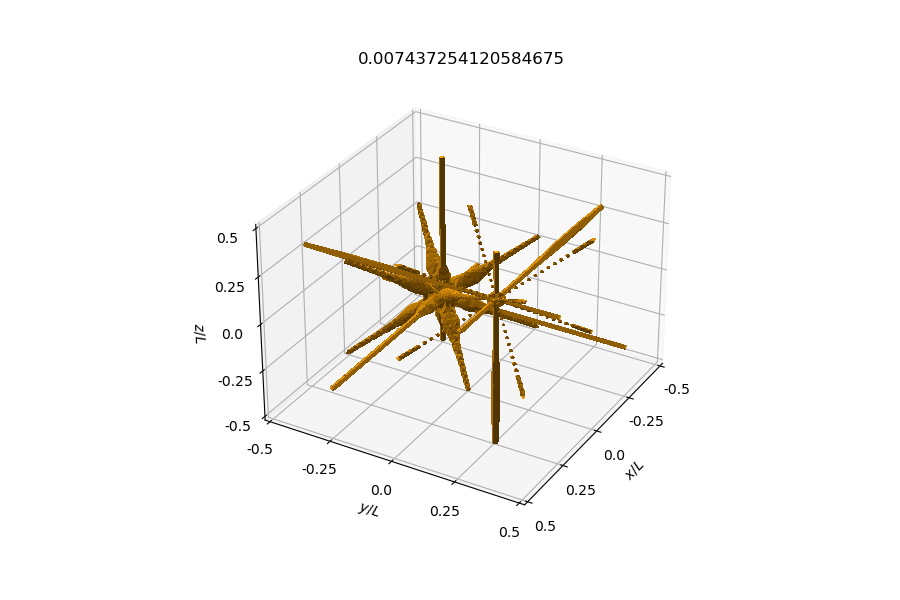

In [38]:
cmap = matplotlib.cm.get_cmap('inferno')
nbr_plots = 300
isovals = np.geomspace(np.nanmin(data)*0.99, np.nanmax(data)*0.99, nbr_plots)[::-1]
for iiso in [0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.15, 0.2]:
    iso = int(iiso*nbr_plots)
    m = matplotlib.cm.ScalarMappable(cmap=cmap)
    m.set_array(isovals)
    ticks = [0, (Lin.N-1)/4, (Lin.N-1)/2, 3*(Lin.N-1)/4, (Lin.N-1)]
    tickm = [-0.5, -0.25, 0.0, 0.25, 0.5]
    fig = plt.figure(figsize=(9, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax = fig.add_subplot(gs[0], projection='3d')
    verts, faces, _, _ = measure.marching_cubes_lewiner(data, level=isovals[iso])
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], linewidth=0, alpha=1, edgecolor='none', antialiased=False, color=cmap(1-iso/nbr_plots))
    ax.set_title(isovals[iso])
    ax.set_xlim(0, Lin.N-1)
    ax.set_ylim(0, Lin.N-1)
    ax.set_zlim(0, Lin.N-1)
    ax.set_xticks(ticks)
    ax.set_xticklabels(tickm)
    ax.set_xlabel(r'$x/L$')
    ax.set_yticks(ticks)
    ax.set_yticklabels(tickm)
    ax.set_ylabel(r'$y/L$')
    ax.set_zticks(ticks)
    ax.set_zticklabels(tickm)
    ax.set_zlabel(r'$z/L$')
    ax.view_init(30,30)